In [2]:
import numpy as np
import csv
import math
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import ipywidgets
from IPython.display import display

In [3]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Mô hình dự đoán khí hậu đơn giản nhất:
 Mô hình dự đoán khí hậu đơn giản nhất sẽ dự đoán sự thay đổi của nhiệt độ.
 Mô hình dự đoán dựa trên 3 yếu tố:
  + Bức xạ mặt trời 
  + Bức xạ nhiệt
  + Hiệu ứng nhà kính
  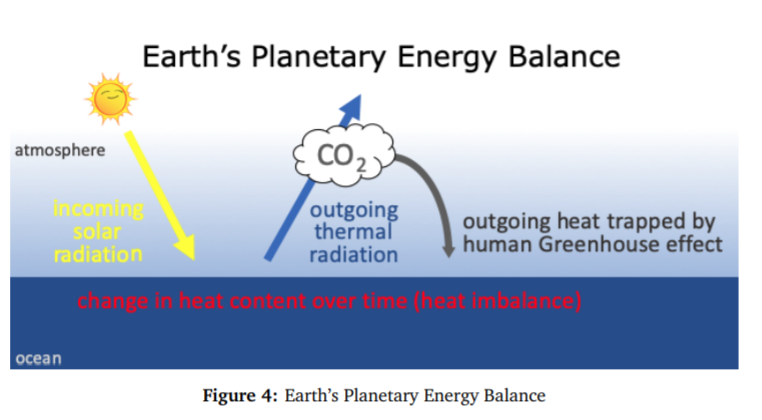
  

# Trực quan hóa dữ liệu quan sát của NASA

[['Land-Ocean', 'Temperature', 'Index', '(C)'], ['--------------------------------'], [], ['Year', 'No_Smoothing', '', 'Lowess(5)'], ['----------------------------'], ['1880', '', '', '', '', '-0.15', '', '', '', '', '-0.08'], ['1881', '', '', '', '', '-0.07', '', '', '', '', '-0.12'], ['1882', '', '', '', '', '-0.10', '', '', '', '', '-0.15'], ['1883', '', '', '', '', '-0.17', '', '', '', '', '-0.19'], ['1884', '', '', '', '', '-0.27', '', '', '', '', '-0.23'], ['1885', '', '', '', '', '-0.32', '', '', '', '', '-0.25'], ['1886', '', '', '', '', '-0.31', '', '', '', '', '-0.26'], ['1887', '', '', '', '', '-0.35', '', '', '', '', '-0.26'], ['1888', '', '', '', '', '-0.17', '', '', '', '', '-0.26'], ['1889', '', '', '', '', '-0.10', '', '', '', '', '-0.25'], ['1890', '', '', '', '', '-0.34', '', '', '', '', '-0.25'], ['1891', '', '', '', '', '-0.22', '', '', '', '', '-0.25'], ['1892', '', '', '', '', '-0.27', '', '', '', '', '-0.26'], ['1893', '', '', '', '', '-0.31', '', '', '', '', '-0

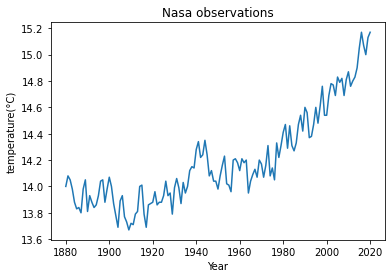

In [6]:
with open('/content/drive/MyDrive/nasa_observations.txt') as csv_file:
    csv_reader = list(csv.reader(csv_file, delimiter=' '))
    print(csv_reader)
    #print(map(lambda x: [(int(i)) if float(i) > 1000 else (float(i) + 14.15)    for i in x if i != '' ], csv_reader[5:]))
    nasa_observations = np.array(list(map(lambda x: [(int(i)) if float(i) > 1000 else (float(i) + 14.15)    for i in x if i != '' ], csv_reader[5:])))

plt.plot(nasa_observations[:,0], nasa_observations[:,1])
plt.title("Nasa observations")
plt.xlabel("Year")
plt.ylabel("temperature(°C)")
plt.show()


# Set giá trị cho thời gian (200 năm từ 1850 -> 2050)

In [7]:
t = np.linspace(0, 200, 201)


>
**Absorted solar radiation**

* Avg Temperature in 1850:<space><space>$temp_0 = 14.0 °C$
* Solar Insolation:<space><space> $S = 1368 W/m^2$
* Albedo or plentary reflectivity:<space><space> $α = 0.3$
* atmosphere and upper-ocean heat capacity:<space><space> $C = 51J /m^2/°C$

In [11]:
temp_0 = 14.0
S = 1368
alpha = 0.3
C = 51

***Earth Baking Formula***:<br />
$$
\begin{aligned}
C.temp^{'}(t) = \frac {S(1 − α)} {4.0}
\end{aligned}
$$

In [ ]:
def absorted_solar_radiation(temp,t, S, alpha):
  return S * (1 - alpha) / 4 

#Visualize Absorted solar radiation 

In [ ]:
def absorted_solar_radiation_demo():
    result = odeint(absorted_solar_radiation, temp_0, t, args=(S,alpha,)) / C

    plt.plot(t + 1850,result[:,0],label='absorted_solar_radiation')
    plt.plot(t[30:-30] + 1850,nasa_observations[:,1],label='nasa_observations')

    plt.legend()
    plt.xlabel("Year")
    plt.ylabel("temperature(°C)")

w = ipywidgets.interactive(absorted_solar_radiation_demo)
display(w)


interactive(children=(Output(),), _dom_classes=('widget-interact',))

# Kết luận
## Nếu chỉ xét bức xạ mặt trời thì lượng nhiệt tăng lên quá chóng mặt!

>**Outgoing: thermal radiation**

* The climate feedback: <space><space> $B 1.3 W/m^2/◦C.$ 

In [ ]:
B = 1.3

$$
\begin{aligned}
temp’(t) = B(temp(0)-temp(t))
\end{aligned}
$$

In [ ]:
def thermal_radiation(temp, t, temp_0, B,C):
    return B*(temp_0 - temp) * (1/C)

# Visualize thermal radiation

In [ ]:
def thermal_radiation_demo(start_temp = 14):
    result = odeint(thermal_radiation, start_temp, t, args=(temp_0,B, C, ))

    plt.plot(t + 1850,result[:,0],label='thermal_radiation')
    plt.plot(t[30:-30] + 1850,nasa_observations[:,1],label='nasa_observations')

    plt.legend()
    plt.xlabel("Year")
    plt.ylabel("temperature(°C)")

start_temp_slider = ipywidgets.FloatSlider(min=12, max=16, step=0.1, value=14)


w = ipywidgets.interactive(thermal_radiation_demo, start_temp=start_temp_slider)
display(w)

interactive(children=(FloatSlider(value=14.0, description='start_temp', max=16.0, min=12.0), Output()), _dom_c…

**Greenhouse: Human-caused greenhouse effect**

* $CO_2$ <space> forcing coefficient is $5.0 W/m^2$
* preindustrial $CO_2$ concentration is 280.

In [ ]:
co2_forcing = 5

$$
\begin{aligned}
\text{human-caused greenhouse effect} = (\text{forcing coef})\ln(\frac{[CO_2]}{[CO_2]_{\text{PreIndust}}}) 
\end{aligned}
$$

* Assume that the CO2 concentration (ppm) increase each t year from 1850 by $(1+(\frac{t}{220})^3)$ times.


In [9]:
def greenhouse(temp, t, co2_forcing):
    return co2_forcing * math.log(1 + pow(t / 220, 3)) / C

#Visualize greenhouse 

In [12]:
def greenhouse_demo(co2_forcing):
    result = odeint(greenhouse, temp_0, t, args=(co2_forcing,)) 

    plt.plot(t + 1850,result[:,0],label='greenhouse')
    plt.plot(t[30:-30] + 1850,nasa_observations[:,1],label='nasa_observations')

    plt.legend()
    plt.xlabel("Year")
    plt.ylabel("temperature(°C)")

C_slider = ipywidgets.IntSlider(min=1, max=1001, step=50, value=51)
co2_forcing_slider = ipywidgets.FloatSlider(min=0, max=20, step=1, value=5)

w = ipywidgets.interactive(greenhouse_demo, co2_forcing=co2_forcing_slider)
display(w)

interactive(children=(FloatSlider(value=5.0, description='co2_forcing', max=20.0, step=1.0), Output()), _dom_c…

# Nhận xét:
###    Xu hướng tăng giống với xu hướng tăng của quan sát từ NASA nhưng vẫn tăng nhanh hơn khá nhiều.

In [ ]:
def climate_model(temp, t, temp_0, B,C, co2_forcing):
    return thermal_radiation(temp, t, temp_0, B, C) + greenhouse(temp, t, co2_forcing)

In [ ]:
def climate_model_demo(B, co2_forcing):
    result = odeint(climate_model, temp_0, t, args=(temp_0, B,C,co2_forcing,)) 

    plt.plot(t + 1850,result[:,0],label='absorted_solar_radiation')
    plt.plot(t[30:-30] + 1850,nasa_observations[:,1],label='nasa_observations')

    plt.legend()
    plt.xlabel("Year")
    plt.ylabel("temperature(°C)")

co2_forcing_slider = ipywidgets.FloatSlider(min=0, max=20, step=1, value=5)
B_slider = ipywidgets.FloatSlider(min=0, max=3, step=0.1, value=1.3)

w = ipywidgets.interactive(climate_model_demo, co2_forcing=co2_forcing_slider, B=B_slider)
display(w)

interactive(children=(FloatSlider(value=1.3, description='B', max=3.0), FloatSlider(value=5.0, description='co…

#Kết luận 
Sau khi kết hợp mô hình sử dụng thermal radiation và greenhouse thì kết quả cho ra xu hướng tăng chính xác hơn so với chỉ greenhouse.